In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import akshare as ak

In [2]:
import matplotlib as mpl
mpl.rcParams["lines.linewidth"] = 3

In [60]:
df_all = pd.read_pickle("./data/simpleusdataset_norm_nona.pkl")
# df_all.datetime = pd.to_datetime(df_all.datetime.astype(str))
# df_all.set_index(["datetime","instrument"],inplace=True)
df_all.sort_index(inplace=True)

In [4]:
# df_all["tradable"] = True

In [61]:
# with open("day_us.txt","w") as f:
#     for i in list(df_all.index.get_level_values("datetime").astype(str).unique()):
#         f.write(i+"\n")

In [5]:
# df_all["tradable"] = ~ ((df_all["open"] == df_all["high"]) &  (df_all["open"] == df_all["low"]) & (df_all["open"] == df_all["close_x"]))

In [6]:
training_stocks = df_all.loc[df_all.index.get_level_values("datetime")<=pd.to_datetime("2017-01-01")].index

In [7]:
training_stocks

MultiIndex([('1994-08-02', '000517.SZ'),
            ('1994-08-02', '600633.SH'),
            ('1994-08-03', '000517.SZ'),
            ('1994-08-03', '600633.SH'),
            ('1994-08-04', '000517.SZ'),
            ('1994-08-04', '600633.SH'),
            ('1994-08-05', '000517.SZ'),
            ('1994-08-05', '600633.SH'),
            ('1994-08-08', '000038.SZ'),
            ('1994-08-08', '000517.SZ'),
            ...
            ('2016-12-30', '603977.SH'),
            ('2016-12-30', '603979.SH'),
            ('2016-12-30', '603987.SH'),
            ('2016-12-30', '603988.SH'),
            ('2016-12-30', '603989.SH'),
            ('2016-12-30', '603990.SH'),
            ('2016-12-30', '603993.SH'),
            ('2016-12-30', '603997.SH'),
            ('2016-12-30', '603998.SH'),
            ('2016-12-30', '603999.SH')],
           names=['datetime', 'instrument'], length=6830685)

In [8]:
training_stocks = list(training_stocks.get_level_values("instrument"))

pred     label
datetime   instrument                    
2021-02-04 A           0.001052 -0.007173
           AA          0.001067  0.028978
           AACG       -0.018150 -0.368264
           AADI        0.001868  0.000000
           AAL         0.001567 -0.012069
...                         ...       ...
2022-10-28 ZVIA        0.001663  0.002137
           ZVRA        0.001868 -0.014084
           ZWS         0.001965  0.025316
           ZYME        0.003149  0.117293
           ZYXI        0.001966  0.083650

[1785131 rows x 2 columns]

In [63]:
doubleadapte

pred     label
datetime   instrument                    
2021-02-03 A           0.001085  0.015718
           AA          0.001220  0.023116
           AACG        0.000986  2.896458
           AADI       -0.000373  0.072368
           AAL         0.001941 -0.011364
...                         ...       ...
2024-01-11 ZVRA       -0.005998 -0.018242
           ZVSA       -0.008837 -0.069136
           ZWS        -0.005706  0.005357
           ZYME       -0.005608 -0.008204
           ZYXI       -0.006345 -0.043519

[3173660 rows x 2 columns]

In [62]:
factorvae = pd.read_pickle("./results/factorvae_us.pkl")
rationialstock = pd.read_pickle("./results/rs_us.pkl")
dva = pd.read_pickle("./results/dva_us.pkl")
doubleadapte = pd.read_pickle("./results/da_us.pkl")


codes = factorvae.index.codes
new_levels = [pd.to_datetime(factorvae.index.levels[0].astype(str),),factorvae.index.levels[1]]
new_index = pd.MultiIndex(levels=new_levels, codes=codes, names=factorvae.index.names)
factorvae.index = new_index

factorvae.rename(columns={"LABEL0":"label","score":"pred"},inplace=True)
rationialstock.rename(columns={"LABEL0":"label","score":"pred"},inplace=True)
dva.rename(columns={0:"pred"},inplace=True)

# factorvae = factorvae.groupby("instrument").shift(1).dropna()
# rationialstock = rationialstock.groupby("instrument").shift(1).dropna()
# dva = dva.groupby("instrument").shift(1).dropna()
# doubleadapte = doubleadapte.groupby("instrument").shift(1).dropna()

In [64]:
factorvae.index.levels[1],dva.index.levels[1],doubleadapte.index.levels[1],rationialstock.index.levels[1]

(Index(['A', 'AA', 'AACG', 'AACI', 'AACIW', 'AACT', 'AADI', 'AAGR', 'AAGRW',
        'AAL',
        ...
        'ZUMZ', 'ZUO', 'ZURA', 'ZURAW', 'ZVIA', 'ZVRA', 'ZVSA', 'ZWS', 'ZYME',
        'ZYXI'],
       dtype='object', name='instrument', length=6643),
 Index(['A', 'AA', 'AACG', 'AACI', 'AACT', 'AADI', 'AAGR', 'AAL', 'AAMC',
        'AAME',
        ...
        'ZTS', 'ZUMZ', 'ZUO', 'ZURA', 'ZVIA', 'ZVRA', 'ZVSA', 'ZWS', 'ZYME',
        'ZYXI'],
       dtype='object', name='instrument', length=6317),
 Index(['A', 'AA', 'AACG', 'AADI', 'AAGR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI',
        ...
        'ZTS', 'ZUMZ', 'ZUO', 'ZURA', 'ZVIA', 'ZVRA', 'ZVSA', 'ZWS', 'ZYME',
        'ZYXI'],
       dtype='object', name='instrument', length=5653),
 Index(['A', 'AA', 'AACG', 'AACI', 'AACIW', 'AACT', 'AADI', 'AAGR', 'AAGRW',
        'AAL',
        ...
        'ZUMZ', 'ZUO', 'ZURA', 'ZURAW', 'ZVIA', 'ZVRA', 'ZVSA', 'ZWS', 'ZYME',
        'ZYXI'],
       dtype='object', name='instrument', length=

# Total RankIC

In [65]:
# factorvae["tradable"] = df_all["tradable"].loc[factorvae.index]
# rationialstock["tradable"] = df_all["tradable"].loc[rationialstock.index]
# dva["tradable"] = df_all["tradable"].loc[dva.index]
# doubleadapte["tradable"] = df_all["tradable"].loc[doubleadapte.index]

In [66]:
def rankic(df):
    ic = df.groupby('datetime').apply(lambda df: df["label"].corr(df["pred"]))
    ric = df.groupby('datetime').apply(lambda df: df["label"].corr(df["pred"], method="spearman"))
    
    print({
            "IC": ic.mean(),
            "ICIR": ic.mean() / ic.std(),
            "Rank IC": ric.mean(),
            "Rank ICIR": ric.mean() / ric.std(),
        })
    return ric

In [67]:
print("FactorVAE: ")
ric_factorvae = rankic(factorvae)
print("doubleadapte: ")
ric_doubleadapte = rankic(doubleadapte)
print("DVA: ")
ric_dva = rankic(dva)
print("RationalStock: ")
ric_rationialstock = rankic(rationialstock)

FactorVAE: 
{'IC': 0.00858243557065709, 'ICIR': 0.07573905326372886, 'Rank IC': -0.0031070244593561203, 'Rank ICIR': -0.02085359210050106}
doubleadapte: 
{'IC': 0.011420150268893037, 'ICIR': 0.12709664449199956, 'Rank IC': -0.012755243665841527, 'Rank ICIR': -0.11693290669387646}
DVA: 
{'IC': -0.0013165801403520736, 'ICIR': -0.08660124074289252, 'Rank IC': -0.0009331447237756014, 'Rank ICIR': -0.06367743531104088}
RationalStock: 
{'IC': 0.00909437400056644, 'ICIR': 0.08407429078030956, 'Rank IC': 0.0021084591949945904, 'Rank ICIR': 0.016054565524750746}


# unseen RankIC

In [ ]:
factorvae.loc[factorvae.index.get_level_values("instrument").isin(training_stocks)]

In [ ]:
def rankic_unseen(df_ori):
    df = df_ori.copy()
    # df = df.loc[df.index.get_level_values("instrument").isin(training_stocks)]
    df = df.loc[df["tradable"]]
    ic = df.groupby('datetime').apply(lambda df: df["label"].corr(df["pred"]))
    ric = df.groupby('datetime').apply(lambda df: df["label"].corr(df["pred"], method="spearman"))
    
    print({
            "IC": ic.mean(),
            "ICIR": ic.mean() / ic.std(),
            "Rank IC": ric.mean(),
            "Rank ICIR": ric.mean() / ric.std(),
        })
    return ric

In [ ]:
print("FactorVAE Unseen: ")
ric_factorvae = rankic_unseen(factorvae)
print("doubleadapte Unseen: ")
ric_doubleadapte = rankic_unseen(doubleadapte)
print("DVA Unseen: ")
ric_dva = rankic_unseen(dva)
print("RationalStock Unseen: ")
ric_rationialstock = rankic_unseen(rationialstock)

# backtest

In [68]:
import seaborn as sns

<Axes: >

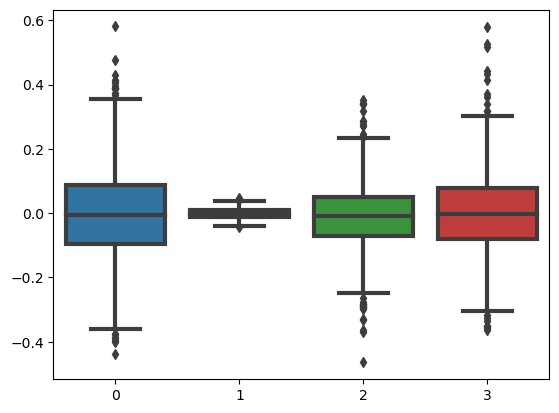

In [69]:
sns.boxplot([ric_factorvae,ric_dva,ric_doubleadapte,ric_rationialstock])

(array([18748., 18871., 18993., 19113., 19236., 19358., 19478., 19601.,
        19723.]),
 [Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09'),
  Text(19723.0, 0, '2024-01')])

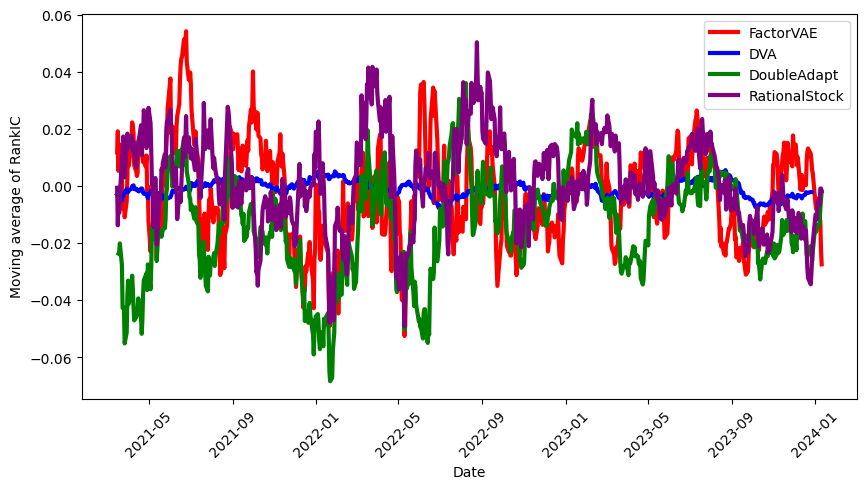

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(ric_factorvae.rolling(30).mean(),label='FactorVAE', color='red')
plt.plot(ric_dva.rolling(30).mean(), label='DVA', color='blue')
plt.plot(ric_doubleadapte.rolling(30).mean(), label='DoubleAdapt', color='green')
plt.plot(ric_rationialstock.rolling(30).mean(), label='RationalStock', color='purple')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Moving average of RankIC')
# plt.grid(True)
plt.xticks(rotation=45)

In [71]:
def calculate_rank_ic(df):
    # Rank transformation
    ranked_preds = df.pred.rank(axis=0)
    ranked_actuals = df.label.rank(axis=0)

    # Standardize
    standardized_preds = (ranked_preds - ranked_preds.mean()) / ranked_preds.std()
    standardized_actuals = (ranked_actuals - ranked_actuals.mean()) / ranked_actuals.std()

    # Calculate individual Rank ICs
    individual_rank_ics = standardized_preds * standardized_actuals

    # Average over time periods
    rank = pd.concat([ranked_preds,ranked_actuals,individual_rank_ics],axis=1).sort_values("label")
    rank.rename(columns={0:"RankIC"},inplace=True)
    return individual_rank_ics,rank

In [72]:
def analyse_rank(all):
    ic_list = []
    for date, df in all.groupby("datetime"):
        individual_rank_ics,rank = calculate_rank_ic(df)
        ic_list.append(rank)
    rank_df = pd.concat(ic_list)
    return rank_df

In [290]:
rank_factorvae = analyse_rank(factorvae)
rank_dva= analyse_rank(dva)
rank_doubleadapte = analyse_rank(doubleadapte)
rank_rationalstock = analyse_rank(rationialstock)

In [75]:
label_list = []
for i,df in rank_rationalstock.groupby("pred")["label"]:
    if i >10:
        break
    label_list.append(df)
    


/home/haiyao/miniconda3/envs/factorvae/lib/python3.9/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

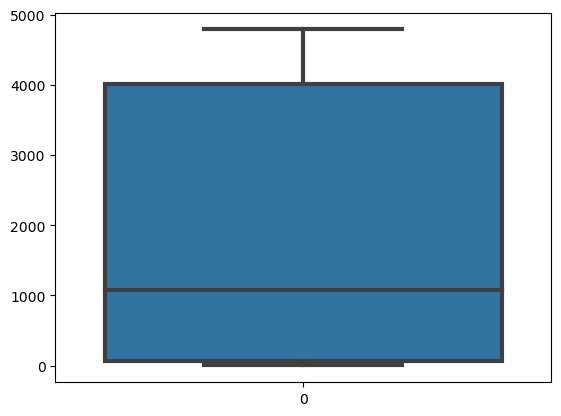

In [76]:
sns.boxplot(pd.concat(label_list))

In [276]:
rank_pred = rank_factorvae.groupby(rely_on)["RankIC"].mean().cumsum()

/tmp/ipykernel_2955156/600911892.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  plt.plot((rank_pred/rank_pred.index)[:300])


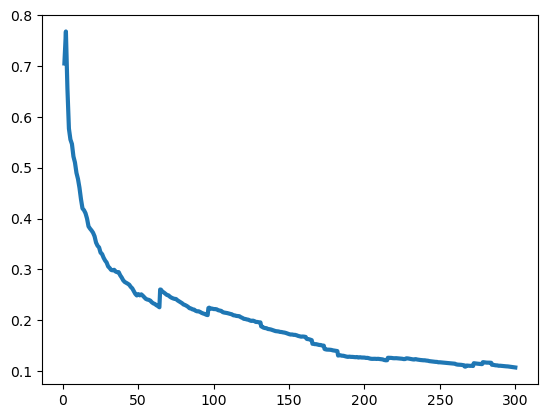

In [283]:
plt.plot()

In [306]:
a = rank_factorvae.groupby(rely_on)["RankIC"].mean()[::-1].cumsum()

In [327]:
a

label
4792.0     -2.926800
4791.0     -5.768558
4790.0     -3.905644
4789.0     -3.559786
4788.0     -4.330359
             ...    
5.0       309.993360
4.0       309.968938
3.0       309.767866
2.0       309.687574
1.0       309.516500
Name: RankIC, Length: 9239, dtype: float64

label
4792.0   -2.926800
4791.0   -2.884279
4790.0   -1.301881
4789.0   -0.889947
4788.0   -0.866072
            ...   
5.0       0.064744
4.0       0.064725
3.0       0.064670
2.0       0.064639
1.0       0.064590
Length: 9239, dtype: float64

In [333]:
(factorvae_cumrank/factorvae_cumrank.index).reset_index()+(a/factorvae_cumrank.index).reset_index()/2

,label,0
0,2397.0,-1.634474
1,2397.5,-1.567822
2,2398.0,-0.801753
3,2398.5,-0.564188
4,2399.0,-0.536080
...,...,...
9234,4790.5,0.097760
9235,4791.0,0.097809
9236,4791.5,0.098156
9237,4792.0,0.097534


In [329]:
(factorvae_cumrank/factorvae_cumrank.index)+(a/factorvae_cumrank.index)

label
1.0      -0.106484
2.0      -0.061043
3.0      -0.086143
4.0      -0.054490
5.0      -0.038300
            ...   
4788.0   -0.800684
4789.0   -0.824500
4790.0   -1.236060
4791.0   -2.819064
4792.0   -2.862210
Length: 9239, dtype: float64

In [321]:
a.values[:10]

array([-2.92679999, -5.7685579 , -3.9056443 , -3.55978604, -4.33035905,
       -4.10404302, -5.06499023, -4.8554905 , -3.96168259, -4.31256568])

In [320]:
a.values[:10]/np.arange(1,10+1)

array([-2.92679999, -2.88427895, -1.30188143, -0.88994651, -0.86607181,
       -0.68400717, -0.72357003, -0.60693631, -0.44018695, -0.43125657])

In [315]:
a.loc[:10]/a.index[::-1]

ValueError: operands could not be broadcast together with shapes (9228,) (9239,) 

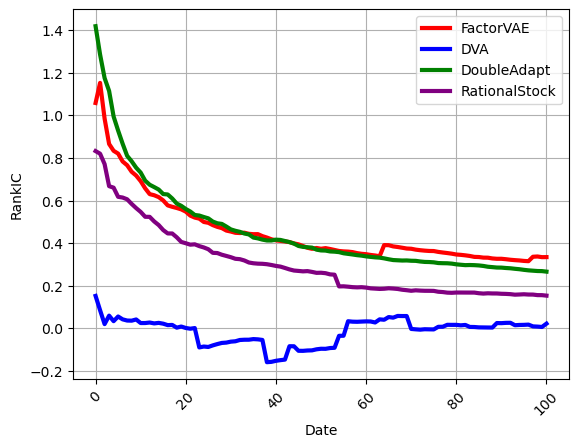

In [336]:
stock_num = 100
rely_on = "pred"
factorvae_cumrank = rank_factorvae.groupby(rely_on)["RankIC"].mean().cumsum()
dva_cumrank =rank_dva.groupby(rely_on)["RankIC"].mean().cumsum()
doubleadapte_cumrank =rank_doubleadapte.groupby(rely_on)["RankIC"].mean().cumsum()
rationalstock_cumrank =rank_rationalstock.groupby(rely_on)["RankIC"].mean().cumsum()

factorvae_cumrank_reverse = rank_factorvae.groupby(rely_on)["RankIC"].mean().cumsum()
dva_cumrank_reverse =rank_dva.groupby(rely_on)["RankIC"].mean().cumsum()
doubleadapte_cumrank_reverse =rank_doubleadapte.groupby(rely_on)["RankIC"].mean().cumsum()
rationalstock_cumrank_reverse =rank_rationalstock.groupby(rely_on)["RankIC"].mean().cumsum()

factorvae_avg_rank = ((factorvae_cumrank/factorvae_cumrank.index).reset_index()+(factorvae_cumrank_reverse/factorvae_cumrank.index).reset_index()/2)
dva_avg_rank = ((dva_cumrank/dva_cumrank.index).reset_index()+(dva_cumrank_reverse/dva_cumrank.index).reset_index()/2)
doubleadapte_avg_rank = ((doubleadapte_cumrank/doubleadapte_cumrank.index).reset_index()+(doubleadapte_cumrank_reverse/doubleadapte_cumrank.index).reset_index()/2)
rationalstock_avg_rank = ((rationalstock_cumrank/rationalstock_cumrank.index).reset_index()+(rationalstock_cumrank_reverse/rationalstock_cumrank.index).reset_index()/2)


plt.plot(factorvae_avg_rank.loc[:stock_num,0],label='FactorVAE', color='red')
plt.plot(dva_avg_rank.loc[:stock_num,0], label='DVA', color='blue')
plt.plot(doubleadapte_avg_rank.loc[:stock_num,0], label='DoubleAdapt', color='green')
plt.plot(rationalstock_avg_rank.loc[:stock_num,0], label='RationalStock', color='purple')
plt.legend()
plt.xlabel('Date')
plt.ylabel('RankIC')
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim(-1,1)
plt.show()

In [78]:
# 

In [79]:
def back_test_bench():
    bench_cum = 1
    bench_hist = [1]
    new_potofolio = potofolio =  new_optimal_potofolio = optimal_potofolio = []
    df_trade_list = []
    profit_list = []
    # all["tradable"] = True
    for date, df in doubleadapte.groupby("datetime"):
        bench = df["label"].mean()
        pre_bench_cum = bench_cum
        bench_cum *=(1+bench)
        bench_hist.append(bench_cum)
        profit_list.append(bench)
    df_history = pd.DataFrame(bench_hist[1:],index=doubleadapte.index.get_level_values("datetime").unique())
    df_history.rename(columns={0:"Cumulative_Returns"},inplace=True)
    df_history['Drawdown'] = df_history['Cumulative_Returns'].div(df_history['Cumulative_Returns'].cummax()) - 1
    df_history["return_rate"] = profit_list
    df_history['Drawdown'].min()
    return df_history

In [88]:
# No short action
def back_test(all,number):
    asset = 1
    optimal_asset = 1
    bench_cum = 1
    history = [1]
    optimal_hist = [1]
    bench_hist = [1]
    new_potofolio = potofolio =  new_optimal_potofolio = optimal_potofolio = []
    df_trade_list = []
    profit_list = []
    # all["tradable"] = True

    for date, df in all.groupby("datetime"):
        trade_df =  df.sort_values(by="pred",ascending=False).head(number)
        new_potofolio = trade_df.index.get_level_values("instrument")
        if len(potofolio)==0:
            fee = 0
        # profit = trade_df["LABEL0"].mean()
        else:
            fee = len(set(new_potofolio) - set(potofolio))/len(potofolio) * 0.0015
        profit = trade_df["label"].mean()
        profit_list.append(profit-fee)
        # fee = 0   
        df_trade_list.append(trade_df)
        bench = df["label"].mean()
        pre_asset = asset
        asset *=(1+profit-fee)
        potofolio = new_potofolio
        history.append(asset)
        optimal_hist.append(optimal_asset)
        pre_bench_cum = bench_cum
        bench_cum *=(1+bench)
        bench_hist.append(bench_cum)
    df_history = pd.DataFrame(history[1:],index=all.index.get_level_values("datetime").unique())
    df_history.rename(columns={0:"Cumulative_Returns"},inplace=True)
    df_history['Drawdown'] = df_history['Cumulative_Returns'].div(df_history['Cumulative_Returns'].cummax()) - 1
    df_history["return_rate"] = profit_list
    df_history['Drawdown'].min()

    return df_history

In [137]:
# with short action
def back_test(all,number):
    asset = 1
    history = [1]
    new_potofolio_short = potofolio_short = new_potofolio = potofolio =  new_optimal_potofolio = optimal_potofolio = []
    df_trade_list = []
    profit_list = []
    # all["tradable"] = True

    for date, df in all.groupby("datetime"):
        trade_df =  df.sort_values(by="pred",ascending=False).head(number)
        new_potofolio = trade_df.index.get_level_values("instrument")
        if len(potofolio)==0:
            fee = 0
        else:
            fee = len(set(new_potofolio) - set(potofolio))/len(potofolio) * 0.0015
        profit = trade_df["label"].mean()
        # profit_list.append()
        # fee = 0   

        long_asset =0.5 *asset* (1+profit-fee)
        potofolio = new_potofolio
        

        trade_df_short =  df.sort_values(by="pred",ascending=True).head(number)
        new_potofolio_short = trade_df_short.index.get_level_values("instrument")
        if len(potofolio_short)==0:
            fee_short = 0
        else:
            fee_short = len(set(new_potofolio_short) - set(potofolio_short))/len(potofolio_short) * 0.0015
        profit_short = -trade_df_short["label"].mean()
        profit_list.append((profit-fee+profit_short-fee_short)/2)
        # fee = 0   
        
        short_asset =0.5*asset*(1+profit_short-fee_short)
        potofolio_short = new_potofolio_short
        asset = long_asset + short_asset
        df_trade_list.append(pd.concat([trade_df,trade_df_short]))
        history.append(asset)

    df_history = pd.DataFrame(history[1:],index=all.index.get_level_values("datetime").unique())
    df_history.rename(columns={0:"Cumulative_Returns"},inplace=True)
    df_history['Drawdown'] = df_history['Cumulative_Returns'].div(df_history['Cumulative_Returns'].cummax()) - 1
    df_history["return_rate"] = profit_list
    df_history['Drawdown'].min()

    return df_history

In [138]:
# shanghai = ak.stock_zh_index_daily(symbol="sh000300")


# shanghai.date = pd.to_datetime(shanghai.date)

# ssrc = shanghai.loc[(shanghai.date>pd.to_datetime("2020-01-01")) & (shanghai.date<pd.to_datetime("2022-12-30")),["date","close"]]

# ssrc

In [139]:
# fig, ax = plt.subplots(figsize=(10,6))
# plt.plot(ssrc.date,ssrc.close,linewidth=3)
# plt.xlabel('Date',fontsize=18)
# plt.ylabel('SSE Composite Index',fontsize=18)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xticks(rotation=45)
# plt.show()

In [140]:
# fig.savefig('./figures/sse_us.svg', dpi=600, format="svg")

## get DJIA index

In [141]:

stock_zh_index_daily_df = ak.index_us_stock_sina(symbol=".DJI")
stock_zh_index_daily_df.date = pd.to_datetime(stock_zh_index_daily_df.date)
stock_zh_index_daily_df.set_index("date",inplace=True)
djia = stock_zh_index_daily_df.close/stock_zh_index_daily_df.close.shift(1)

## get dataset bench 

In [142]:
hist_bench = back_test_bench()

## get baselines data

In [355]:
number_stocks=30

In [356]:
hist_factorvae = back_test(factorvae,number_stocks)
hist_rationalstock = back_test(rationialstock,number_stocks)
hist_dva = back_test(dva,number_stocks)
hist_doubleadapte = back_test(doubleadapte,number_stocks)


In [357]:
hist_djia = pd.DataFrame(djia.loc[hist_factorvae.index].cumprod())

In [358]:
hist_djia.rename(columns={"close":"Cumulative_Returns"},inplace=True)

In [359]:

hist_djia['Drawdown'] = hist_djia.Cumulative_Returns.div(hist_djia.Cumulative_Returns.cummax()) - 1

In [360]:
hist_djia["return_rate"] = djia-1

## maximum drawdown

In [361]:
mmd_dict = {
    "djia":hist_djia['Drawdown'].min(),
    "Dataset":hist_bench['Drawdown'].min(),
    "FactorVAE":hist_factorvae['Drawdown'].min(),
    "DoubleAdapt":hist_doubleadapte['Drawdown'].min(),    
    "DAV":hist_dva['Drawdown'].min(),
    "RationalStock":hist_rationalstock['Drawdown'].min(),

}

In [362]:
mmd_dict

{'djia': -0.21940803651808782,
 'Dataset': -0.3773045771640332,
 'FactorVAE': -0.4461854537665969,
 'DoubleAdapt': -0.3422553151818689,
 'DAV': -0.7109783603941211,
 'RationalStock': -0.3107737055982126}

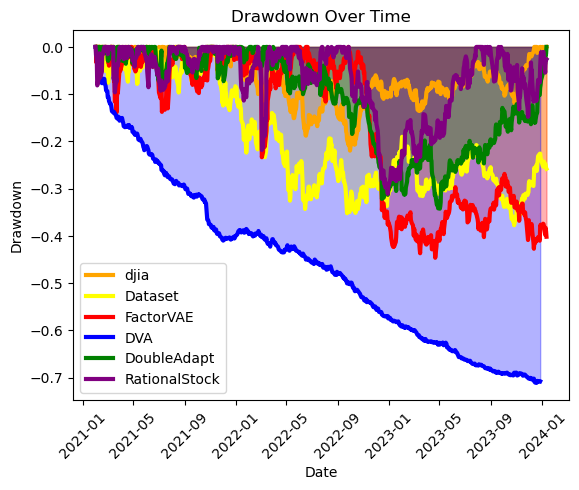

In [363]:
plt.plot(hist_djia.index, hist_djia['Drawdown'], label='djia', color='orange')
plt.fill_between(hist_djia.index, hist_djia['Drawdown'], alpha=0.3, color='orange')
plt.plot(hist_bench.index, hist_bench['Drawdown'], label='Dataset', color='yellow')
plt.fill_between(hist_bench.index, hist_bench['Drawdown'], alpha=0.3, color='yellow')
plt.plot(hist_factorvae.index, hist_factorvae['Drawdown'], label='FactorVAE', color='red')
plt.fill_between(hist_factorvae.index, hist_factorvae['Drawdown'], alpha=0.3, color='red')
plt.plot(hist_dva.index, hist_dva['Drawdown'], label='DVA', color='blue')
plt.fill_between(hist_dva.index, hist_dva['Drawdown'], alpha=0.3, color='blue')
plt.plot(hist_doubleadapte.index, hist_doubleadapte['Drawdown'], label='DoubleAdapt', color='green')
plt.fill_between(hist_doubleadapte.index, hist_doubleadapte['Drawdown'], alpha=0.3, color='green')
plt.plot(hist_rationalstock.index, hist_rationalstock['Drawdown'], label='RationalStock', color='purple')
plt.fill_between(hist_rationalstock.index, hist_rationalstock['Drawdown'], alpha=0.3, color='purple')

plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
# plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

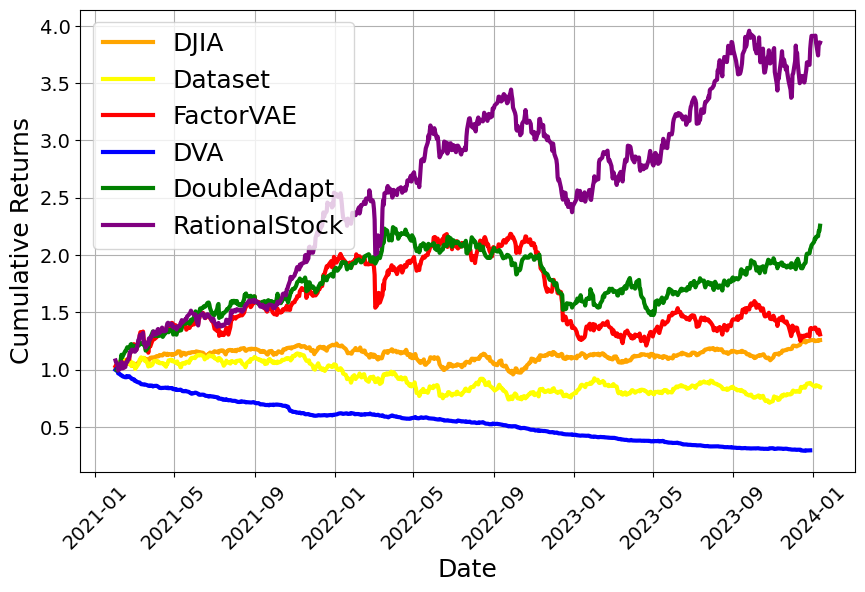

In [364]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(hist_djia["Cumulative_Returns"], label='DJIA', color='orange')
plt.plot(hist_bench["Cumulative_Returns"], label='Dataset', color='yellow')
plt.plot(hist_factorvae["Cumulative_Returns"],label='FactorVAE', color='red')
plt.plot(hist_dva["Cumulative_Returns"], label='DVA', color='blue')
plt.plot(hist_doubleadapte["Cumulative_Returns"], label='DoubleAdapt', color='green')
plt.plot(hist_rationalstock["Cumulative_Returns"], label='RationalStock', color='purple')
plt.legend(fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Cumulative Returns',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [365]:
fig.savefig('./figures/cr_us.svg', dpi=600, format="svg")

## Annualized return

In [366]:
def arr(history):
    year = len(history)/252
    annualized_return = history.loc[history.index[-1],"Cumulative_Returns"]**(1/year)-1
    return annualized_return

In [367]:
hist_dict = {
    "djia":hist_djia,
    "Dataset":hist_bench,
    "FactorVAE":hist_factorvae,
    "DoubleAdapt":hist_doubleadapte,
    "DAV":hist_dva,
    "RationalStock":hist_rationalstock,
}

In [368]:
arr_dict  = {}
for key,value in hist_dict.items():
    arr_dict[key] = arr(hist_dict[key])

In [369]:
arr_dict

{'djia': 0.08100070111056135,
 'Dataset': -0.05502071359095051,
 'FactorVAE': 0.09532820099056871,
 'DoubleAdapt': 0.3192030161230659,
 'DAV': -0.34271547260668933,
 'RationalStock': 0.5810925506179776}

In [370]:
# plt.plot(hist_rationalstock["Cumulative_Returns"])

## MaximumDrawDown

In [371]:
mmd_dict

{'djia': -0.21940803651808782,
 'Dataset': -0.3773045771640332,
 'FactorVAE': -0.4461854537665969,
 'DoubleAdapt': -0.3422553151818689,
 'DAV': -0.7109783603941211,
 'RationalStock': -0.3107737055982126}

## Sharp Ratio

In [372]:

import akshare as ak
bond_zh_us_rate_df = ak.bond_zh_us_rate(start_date="19901219")

In [ ]:
# bond_zh_us_rate_df = ak.bond_zh_us_rate(start_date="19901219")["美国国债收益率2年"]

In [373]:

def sr(df,annualized_return):
    risk_free_rate = bond_zh_us_rate_df.loc[(pd.to_datetime(bond_zh_us_rate_df["日期"])>pd.to_datetime("20210101"))&(pd.to_datetime(bond_zh_us_rate_df["日期"])<("20240111")),"美国国债收益率2年"].mean()/100
    standard_deviation_of_investment = df["return_rate"].std()* np.sqrt(252)
    sharpe_ratio = (annualized_return - risk_free_rate) / standard_deviation_of_investment
    return sharpe_ratio

In [374]:
sr_dic = {}
for key,value in arr_dict.items():
    sr_dic[key] = sr(hist_dict[key],value)

In [375]:
sr_dic

{'djia': 0.3657907904518432,
 'Dataset': -0.35760830102872926,
 'FactorVAE': 0.23430165839395542,
 'DoubleAdapt': 1.2788649742412481,
 'DAV': -4.705606943562344,
 'RationalStock': 1.9119642012734581}

In [222]:
func = sr

In [224]:
portfolio_line = pd.DataFrame(columns=["FactorVAE","DoubleAdapte","DVA","InvariantStock"])
for number_stocks in [10,20,30,50,100,150,200,250,300]:
    hist_factorvae = back_test(factorvae,number_stocks)
    hist_InvariantStock = back_test(rationialstock,number_stocks)
    hist_dva = back_test(dva,number_stocks)
    hist_doubleadapte = back_test(doubleadapte,number_stocks)
    portfolio_line.loc[number_stocks]=({"FactorVAE":func(hist_factorvae,arr(hist_factorvae)),"DoubleAdapte":func(hist_doubleadapte,arr(hist_doubleadapte)),"DVA":func(hist_dva,arr(hist_dva)),"InvariantStock":func(hist_InvariantStock,arr(hist_InvariantStock))})

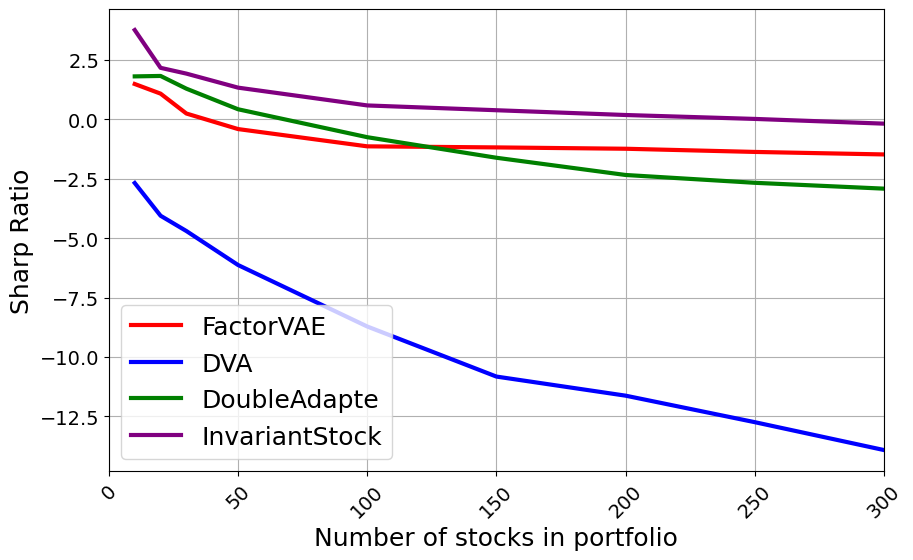

In [376]:

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(portfolio_line["FactorVAE"],label='FactorVAE', color='red')
plt.plot(portfolio_line["DVA"], label='DVA', color='blue')
plt.plot(portfolio_line["DoubleAdapte"], label='DoubleAdapte', color='green')
plt.plot(portfolio_line["InvariantStock"], label='InvariantStock', color='purple')
plt.xlim(0,300)
plt.xlabel('Number of stocks in portfolio',fontsize=18)
plt.ylabel('Sharp Ratio',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(fontsize=18)
plt.show()

In [354]:
fig.savefig('./figures/ab_portfolio_us.svg', dpi=600, format="svg")